bp_stage
Normal                  21
Elevated                16
Stage 1 Hypertension    49
Stage 2 Hypertension    14
Name: count, dtype: int64


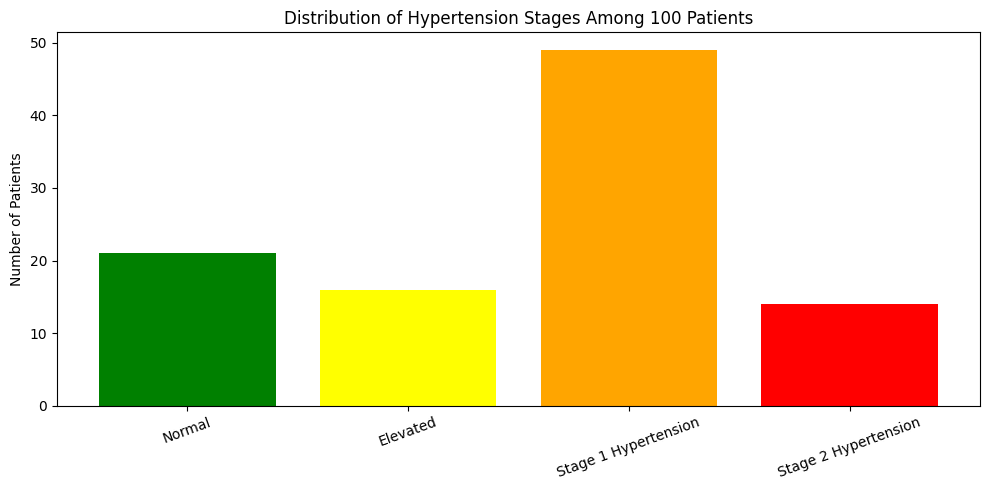

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate mock data
np.random.seed(42)
n = 100

df = pd.DataFrame({
    "patient_id": range(1, n+1),
    "systolic": np.random.normal(120, 15, n).round(),
    "diastolic": np.random.normal(80, 10, n).round()
})

# Function to classify blood pressure stage
def classify_bp(s, d):
    if s < 120 and d < 80:
        return "Normal"
    elif 120 <= s < 130 and d < 80:
        return "Elevated"
    elif (130 <= s < 140) or (80 <= d < 90):
        return "Stage 1 Hypertension"
    elif s >= 140 or d >= 90:
        return "Stage 2 Hypertension"
    else:
        return "Uncategorized"

# Apply classification
df["bp_stage"] = df.apply(lambda row: classify_bp(row["systolic"], row["diastolic"]), axis=1)

# Count occurrences of each stage
stage_counts = df["bp_stage"].value_counts().reindex(
    ["Normal", "Elevated", "Stage 1 Hypertension", "Stage 2 Hypertension"],
    fill_value=0
)

print(stage_counts)

# Plot histogram (bar chart)
plt.figure(figsize=(10, 5))
plt.bar(stage_counts.index, stage_counts.values, color=["green", "yellow", "orange", "red"])

plt.ylabel("Number of Patients")
plt.title("Distribution of Hypertension Stages Among 100 Patients")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

